# Week 9-1: Unsupervised Machine Learning

## Bibliotheken importeren

In [279]:
import pandas as pd
import sqlite3 as s3
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter('ignore')

## Data inlezen en kolommen selecteren

In [280]:
go_sales = s3.connect('go_sales.sqlite')
go_crm = s3.connect('go_crm.sqlite')
df = pd.read_sql_query('SELECT * FROM sales_branch', go_sales)
df = pd.merge(df, pd.read_sql_query('SELECT * FROM country', go_crm), on='COUNTRY_CODE')
df = pd.merge(df, pd.read_sql_query('SELECT * FROM sales_territory', go_crm), on='SALES_TERRITORY_CODE')
df

# SALES BRANCH EN STAFF

,SALES_BRANCH_CODE,ADDRESS1,ADDRESS2,CITY,REGION,POSTAL_ZONE,COUNTRY_CODE,TRIAL888,COUNTRY_EN,FLAG_IMAGE,SALES_TERRITORY_CODE,TRIAL219,TERRITORY_NAME_EN,TRIAL222
0,13,Schwabentor 35,None,Hamburg,None,D-22529,2,T,Germany,F02,6,T,Central Europe,T
1,14,Leopoldstraße 36,None,München,None,D-81241,2,T,Germany,F02,6,T,Central Europe,T
2,15,Isafjordsgatan 30 C,None,Kista,None,S-164 40,10,T,Sweden,F10,5,T,Northern Europe,T
3,17,"7800, 756 - 6th Avenue. S.W.",None,Calgary,Alberta,T2P 3Z0,4,T,Canada,F04,1,T,Americas,T
4,18,789 Yonge Street,None,Toronto,Ontario,M2M 4K8,4,T,Canada,F04,1,T,Americas,T
5,19,1288 Dorchester Avenue,None,Boston,Massachusetts,02133,3,T,United States,F03,1,T,Americas,T
6,20,299 Yale Avenue,None,Seattle,Washington,98139,3,T,United States,F03,1,T,Americas,T
7,21,1288 South Barrington Ave.,None,Los Angeles,California,90072,3,T,United States,F03,1,T,Americas,T
8,22,10032 NW 186th,None,Miami,Florida,33024,3,T,United States,F03,1,T,Americas,T
9,23,"6c, rue de l'Église",None,Lyon,None,F-69002,1,T,France,F01,6,T,Central Europe,T


In [281]:
df = df.loc[:, ['SALES_BRANCH_CODE', 'COUNTRY_CODE', 'SALES_TERRITORY_CODE', 'REGION', 'CITY']]
df

,SALES_BRANCH_CODE,COUNTRY_CODE,SALES_TERRITORY_CODE,REGION,CITY
0,13,2,6,None,Hamburg
1,14,2,6,None,München
2,15,10,5,None,Kista
3,17,4,1,Alberta,Calgary
4,18,4,1,Ontario,Toronto
5,19,3,1,Massachusetts,Boston
6,20,3,1,Washington,Seattle
7,21,3,1,California,Los Angeles
8,22,3,1,Florida,Miami
9,23,1,6,None,Lyon


## One-hot encoding van onafhankelijke niet-numerieke variabelen

In [282]:
# df['Pclass'] = df['Pclass'].astype(str)
# df.dtypes

In [283]:
df = pd.get_dummies(df, columns=['REGION', 'CITY'])

df

,SALES_BRANCH_CODE,COUNTRY_CODE,SALES_TERRITORY_CODE,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,...,CITY_Paris,CITY_San Chung,CITY_Seattle,CITY_Seoul,CITY_Shanghai,CITY_São Paulo,CITY_Tokyo,CITY_Toronto,CITY_Wien,CITY_Zürich
0,13,2,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,14,2,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,15,10,5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,17,4,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,18,4,1,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
5,19,3,1,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,20,3,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7,21,3,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,22,3,1,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,23,1,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Clusteringmodel bouwen met 2 dimensies

In [284]:
# df_2d = df.loc[:, ['Age', 'Survived']]
# df_2d

In [285]:
kmeans = KMeans(n_clusters = 8, random_state = 42)
prediction_results = kmeans.fit_predict(df)
prediction_results

array([1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 0, 4, 4, 5, 5, 5, 5, 7, 7, 7, 2, 2,
       2, 7, 2, 3, 3, 3])

In [286]:
# kmeans_centra = pd.DataFrame(kmeans.cluster_centers_)
# kmeans_centra

In [287]:
# for i in range(len(kmeans_centra.columns)):
#     kmeans_centra = kmeans_centra.rename(columns = {i : f'{df_2d.columns[i]}'})
    
# kmeans_centra

In [288]:
# for src_index, _ in df_2d.iterrows():
#     euclidian_distances = dict()
#     print(f"Afstand van bronindex {src_index} tot...")

#     for centrumindex, _ in kmeans_centra.iterrows():
#         print(f"\tCentrumindex {centrumindex}:")
#         euclidian_sum = 0

#         for column_name in kmeans_centra.columns:
#             current_difference = df_2d.at[src_index, column_name] - kmeans_centra.at[centrumindex, column_name]
#             print(f'\t\t{df_2d.at[src_index, column_name]} - {kmeans_centra.at[centrumindex, column_name]} = {current_difference}')
#             euclidian_sum += current_difference ** 2
        
#         print(f'\tTotale euclidische som: {euclidian_sum}')
#         euclidian_distance = math.sqrt(euclidian_sum)
#         print(f'\tEuclidische afstand: {euclidian_distance}')
#         euclidian_distances[centrumindex] = euclidian_distance
#         print('------------------------------------------------')
    
#     print(euclidian_distances)
#     centrum_number = min(euclidian_distances, key = euclidian_distances.get)
#     print(centrum_number)
#     df_2d.at[src_index, 'Centrum'] = centrum_number
#     print("================================================")

# df_2d

In [289]:
df['Centrum'] = prediction_results
df

,SALES_BRANCH_CODE,COUNTRY_CODE,SALES_TERRITORY_CODE,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,...,CITY_San Chung,CITY_Seattle,CITY_Seoul,CITY_Shanghai,CITY_São Paulo,CITY_Tokyo,CITY_Toronto,CITY_Wien,CITY_Zürich,Centrum
0,13,2,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,14,2,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,15,10,5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,17,4,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6
4,18,4,1,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,6
5,19,3,1,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,6
6,20,3,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,6
7,21,3,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6
8,22,3,1,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6
9,23,1,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6


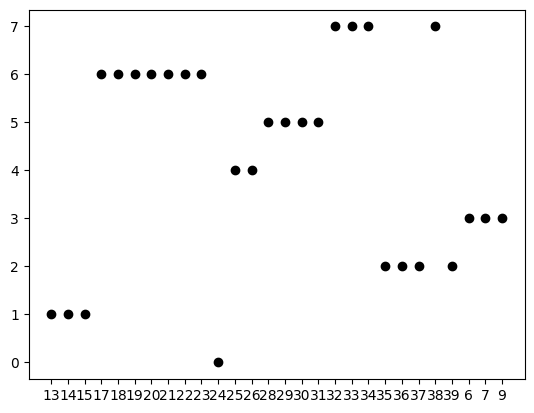

In [290]:
plt.scatter(df['SALES_BRANCH_CODE'], df['Centrum'], color = 'k')
plt.show()

In [291]:
df.groupby('Centrum', as_index = False)['Centrum'].count()

,Centrum
0,1
1,3
2,4
3,3
4,2
5,4
6,7
7,4


## Clusteringmodel bouwen met meer dan 2 dimensies (alle kolommen uit de dataset)

### Centra berekenen

In [292]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
prediction_results = kmeans.fit_predict(df)
prediction_results

array([4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 0, 5, 5, 5, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1])

In [293]:
df['Centrum'] = prediction_results
df

,SALES_BRANCH_CODE,COUNTRY_CODE,SALES_TERRITORY_CODE,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,...,CITY_San Chung,CITY_Seattle,CITY_Seoul,CITY_Shanghai,CITY_São Paulo,CITY_Tokyo,CITY_Toronto,CITY_Wien,CITY_Zürich,Centrum
0,13,2,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
1,14,2,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
2,15,10,5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,17,4,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
4,18,4,1,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,2
5,19,3,1,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,2
6,20,3,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,2
7,21,3,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
8,22,3,1,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
9,23,1,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2


### De juiste centra toewijzen aan rijen uit de dataset

In [294]:
df.groupby('Centrum', as_index = False)['Centrum'].count()

,Centrum
0,4
1,4
2,7
3,8
4,2
5,3


## Evalueren